In [1]:
import pandas as pd

# Load CSV file
Dataset_Train = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Train_Final.csv')
Dataset_Test = pd.read_csv('C:/Users/Ashani Madushani/Desktop/Data Analysis 3/Dataset_Test_Final.csv')

In [2]:
Dataset_Train.head()

,age,gender,height_cm,weight_kg,activity_group,duration_minutes,intensity,calories_burned,daily_steps,avg_heart_rate,...,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,fitness_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,bmi
0,49,F,153.7,57.30,"Strength, Recreational, Sport-Based Cardio",71.671130,"Medium, Low",12.240586,8670.912134,126.280335,...,133.6,88.9,10.67,10.247490,7.064435,5,2.559833,Never,healthy,24.255313
1,45,M,178.1,73.54,"Low-Impact Cardio, Strength, High-Impact Cardio",77.080658,"Medium, Low",17.809465,8791.806584,129.152263,...,134.9,84.2,13.64,9.861523,7.044033,6,2.534979,Never,Hypertension,23.184396
2,48,M,158.4,61.91,"Strength, Low-Impact Cardio, Sport-Based Cardio",79.002553,"Medium, Low",15.480426,8459.927660,127.778723,...,135.5,63.9,11.85,9.402638,7.078723,5,2.542128,Never,healthy,24.674619
3,27,F,157.6,53.05,"High-Impact Cardio, Low-Impact Cardio, Strength",74.048889,"Medium, Low",11.542667,8745.328889,141.702222,...,125.3,70.8,10.52,9.134444,7.049778,5,2.483111,Current,healthy,21.358609
4,60,M,184.0,73.33,"High-Impact Cardio, Low-Impact Cardio, Sport-B...",76.201786,"Medium, Low",15.542857,8572.321429,118.544643,...,131.2,86.0,12.55,8.760714,7.010714,4,2.474107,Former,healthy,21.659381


🔹 Class Counts:
health_condition
healthy         1711
Hypertension     347
Diabetes         226
Asthma           116
Name: count, dtype: int64

🔹 Class Percentages:
health_condition
healthy         71.29
Hypertension    14.46
Diabetes         9.42
Asthma           4.83
Name: proportion, dtype: float64


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_16796\1390208334.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='health_condition', data=Dataset_Train, palette='Set2')


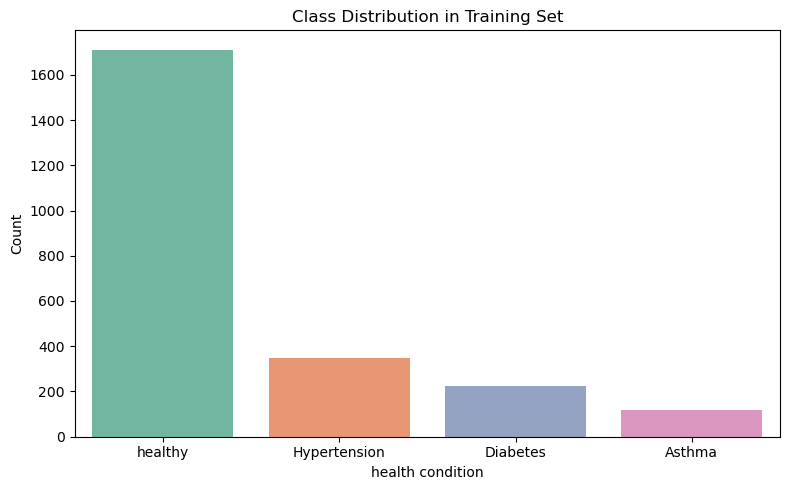

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of instances in each class
class_counts = Dataset_Train['health_condition'].value_counts()
class_percentages = Dataset_Train['health_condition'].value_counts(normalize=True) * 100

# Display results
print("🔹 Class Counts:")
print(class_counts)
print("\n🔹 Class Percentages:")
print(class_percentages.round(2))

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='health_condition', data=Dataset_Train, palette='Set2')
plt.title("Class Distribution in Training Set")
plt.xlabel("health condition")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [4]:
#Applying smote to class balance
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming your data is already loaded in Dataset_Train
X = Dataset_Train.drop(columns=['health_condition'])
y = Dataset_Train['health_condition']

# Split train/test if needed (optional)
# X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 1. Identify column types
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# 3. Fit preprocessor and transform features
X_processed = preprocessor.fit_transform(X)

# 4. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# 5. Optional: Check new class distribution
print("✅ Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Now you can use X_resampled and y_resampled to train your models


✅ Class distribution after SMOTE:
health_condition
healthy         1711
Hypertension    1711
Asthma          1711
Diabetes        1711
Name: count, dtype: int64


c:\Users\acer\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:23:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Train Accuracy: 1.0
✅ Test Accuracy : 0.6966666666666667

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.00      0.00      0.00        29
    Diabetes       0.00      0.00      0.00        57
Hypertension       0.38      0.09      0.15        87
     healthy       0.72      0.96      0.82       427

    accuracy                           0.70       600
   macro avg       0.28      0.26      0.24       600
weighted avg       0.57      0.70      0.61       600



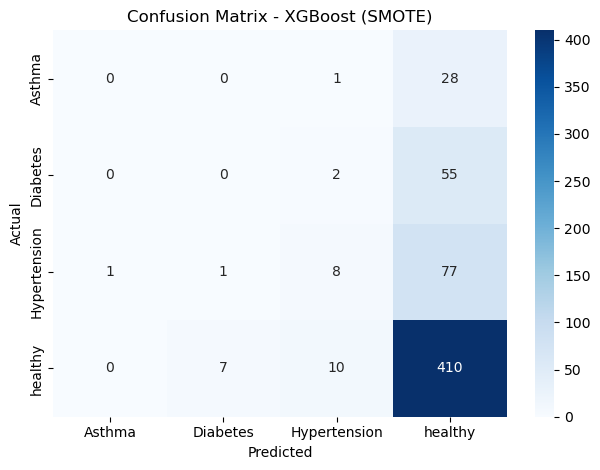

In [6]:
#fitting xgboost model
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 1. Encode categorical labels to numeric
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)

# 🔹 2. Fit XGBoost on encoded SMOTE-resampled data
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_resampled, y_resampled_encoded)

# 🔹 3. Predict on training data
y_train_pred_encoded = xgb.predict(X_resampled)
y_train_pred = le.inverse_transform(y_train_pred_encoded)

# 🔹 4. Process test data
X_test = Dataset_Test.drop(columns=['health_condition'])
y_test = Dataset_Test['health_condition']
X_test_processed = preprocessor.transform(X_test)

# 🔹 5. Encode y_test and predict
y_test_pred_encoded = xgb.predict(X_test_processed)
y_test_pred = le.inverse_transform(y_test_pred_encoded)

# 🔹 6. Accuracy
print("✅ Train Accuracy:", accuracy_score(y_resampled, y_train_pred))
print("✅ Test Accuracy :", accuracy_score(y_test, y_test_pred))

# 🔹 7. Classification Report
print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# 🔹 8. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\acer\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:29:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
✅ Train Accuracy: 1.0
✅ Test Accuracy : 0.6983333333333334

🔹 Classification Report (Test Data):
              precision    recall  f1-score   support

      Asthma       0.00      0.00      0.00        29
    Diabetes       0.00      0.00      0.00        57
Hypertension       0.30      0.03      0.06        87
     healthy       0.71      0.97      0.82       427

    accuracy                           0.70       600
   macro avg       0.25      0.25      0.22       600
weighted avg       0.55      0.70      0.59       600



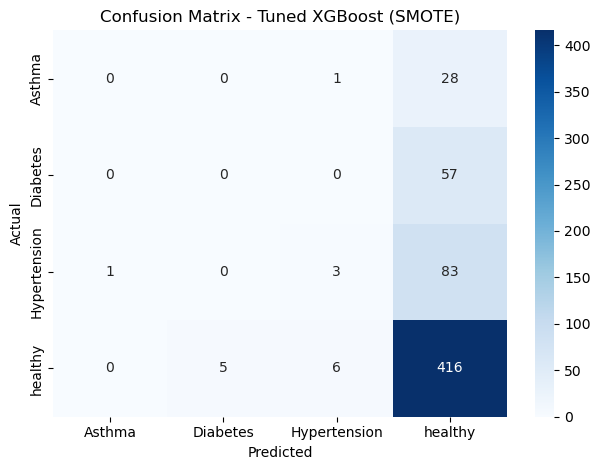

In [7]:
# hyper parameter tuning of xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Encode target labels for compatibility with XGBoost
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)
y_test_encoded = le.transform(y_test)

# 2. Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# 3. Initialize XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 4. Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# 5. Fit GridSearchCV
grid_search.fit(X_resampled, y_resampled_encoded)
best_model = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)

# 6. Predict on train and test
y_train_pred_encoded = best_model.predict(X_resampled)
y_test_pred_encoded = best_model.predict(X_test_processed)

# 7. Decode predictions
y_train_pred = le.inverse_transform(y_train_pred_encoded)
y_test_pred = le.inverse_transform(y_test_pred_encoded)

# 8. Accuracy scores
print("✅ Train Accuracy:", accuracy_score(y_resampled, y_train_pred))
print("✅ Test Accuracy :", accuracy_score(y_test, y_test_pred))

# 9. Classification report
print("\n🔹 Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Tuned XGBoost (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
